<a href="https://colab.research.google.com/github/Darkandpure/Machine_learning-/blob/main/Fraud_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets read the dataset

In [3]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/machine_learning_dataset/Fraud.csv")

# OK, great now lets have a look at some rows

In [5]:
data.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0

In [6]:
data.tail()

step      type      amount     nameOrig  oldbalanceOrg  \
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
6362615             0.0   C776919290            0.00       339682.13        1   
6362616             0.0  C1881841831            0.00            0.00        1   
6362617             0.0  C1365125890        68488.84      6379898.11        1   
6362618             0.0  C2080388513            0.00            0.00        1   
6362619             0.0   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0

# Lets understand the data set provided


Understanding the columns:

  - step is the unit of time which according to this data source is 1 hour
  - type is the transaction type (CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER)
  - amount is the transaction amount
  -nameOrig is the transaction originator, this may indicate the person sending the payment
  -oldbalanceOrg is the initial balance (before transaction)
  -newbalanceOrig is the new balance (after transaction)
  -nameDest is the transaction recipient, person receiving the payment
  -oldbalanceDest is the initial balance before transaction.
  -newbalanceDest is the new balance after transaction.
  -isFraud is when a Fraud agent takes control of customers accounts and attempts to empty it by transferring to another account and then cashing out.
  -isFlaggedFraud is an illegal attempt to transfer massive amount of money in a single transaction.



# lets have a look to types of the dataset

In [ ]:
data.dtypes


step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [ ]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

- Fine, we dont have null vlaues, cleaning not required, good to go

# Encoding categorical variables
-  the **Type** column is categorical, and the remaining columns are numeric.
- Choosed one hot encoding as here is no inherent order or ranking among the categories.

In [7]:
# Perform one-hot encoding on the 'type' column
data = pd.get_dummies(data, columns=['type'])

# Print the encoded data
data.head()

step    amount     nameOrig  oldbalanceOrg  newbalanceOrig     nameDest  \
0     1   9839.64  C1231006815       170136.0       160296.36  M1979787155   
1     1   1864.28  C1666544295        21249.0        19384.72  M2044282225   
2     1    181.00  C1305486145          181.0            0.00   C553264065   
3     1    181.00   C840083671          181.0            0.00    C38997010   
4     1  11668.14  C2048537720        41554.0        29885.86  M1230701703   

   oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  \
0             0.0             0.0        0               0             0   
1             0.0             0.0        0               0             0   
2             0.0             0.0        1               0             0   
3         21182.0             0.0        1               0             0   
4             0.0             0.0        0               0             0   

   type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              0           0             1              0  
1              0           0             1              0  
2              0           0             0              1  
3              1           0             0              0  
4              0           0             1              0

In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Perform label encoding on the 'type' column
# label_encoder = LabelEncoder()
# data['type_encoded'] = label_encoder.fit_transform(data['type'])
# data.head()

# Now lets do some feature engineering

#1. Transaction Frequency
- the number of transactions initiated by each customer (nameOrig) or received by each recipient (nameDest)
- This can provide insights into the transaction behavior and identify suspicious activity.

In [ ]:
# Calculate the number of transactions initiated by each customer (nameOrig)
transactions_by_customer = data['nameOrig'].value_counts()

# Calculate the number of transactions received by each recipient (nameDest)
transactions_by_recipient = data['nameDest'].value_counts()

# Print the results
print("Transactions initiated by each customer:")
print(transactions_by_customer.head())
print("\nTransactions received by each recipient:")
print(transactions_by_recipient.head())

Transactions initiated by each customer:
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
Name: nameOrig, dtype: int64

Transactions received by each recipient:
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
Name: nameDest, dtype: int64


# 2. Transaction Amount Deviation

-  compute the difference between the transaction amount (amount) and the average transaction amount for each customer (nameOrig) or recipient (nameDest)

- Unusually large or small deviations from the average could indicate fraudulent activity.

In [ ]:


# Compute the average transaction amount for each customer (nameOrig)
customer_avg_amount = data.groupby('nameOrig')['amount'].transform('mean')

# Compute the difference between the transaction amount and the average amount for each customer
customer_amount_diff = data['amount'] - customer_avg_amount

# Compute the average transaction amount for each recipient (nameDest)
recipient_avg_amount = data.groupby('nameDest')['amount'].transform('mean')

# Compute the difference between the transaction amount and the average amount for each recipient
recipient_amount_diff = data['amount'] - recipient_avg_amount

# Print the results
print("Difference between transaction amount and average amount for each customer:")
print(customer_amount_diff.head())
print("\nDifference between transaction amount and average amount for each recipient:")
print(recipient_amount_diff.head())


# 3. Time-based Features
- Extract additional time-based features from the step column, such as the hour of the day, the day of the week, or the month
- These features can capture potential patterns or anomalies in fraudulent transactions based on specific time periods.

In [ ]:
# Convert step to datetime
data['timestamp'] = pd.to_datetime(data['step'] * 3600, unit='s')

# Extract hour of the day, day of the week, and month
data['hour_of_day'] = data['timestamp'].dt.hour
data['day_of_week'] = data['timestamp'].dt.dayofweek
data['month'] = data['timestamp'].dt.month

# Print the results
print("Hour of the day:")
data['hour_of_day'].head()
print("\nDay of the week:")
data['day_of_week'].head()
print("\nMonth:")
data['month'].head()


Hour of the day:

Day of the week:

Month:


3196942    1
2798983    1
1013585    1
2980283    1
1920204    1
Name: month, dtype: int64

# lets see it vizually

KeyError: ignored

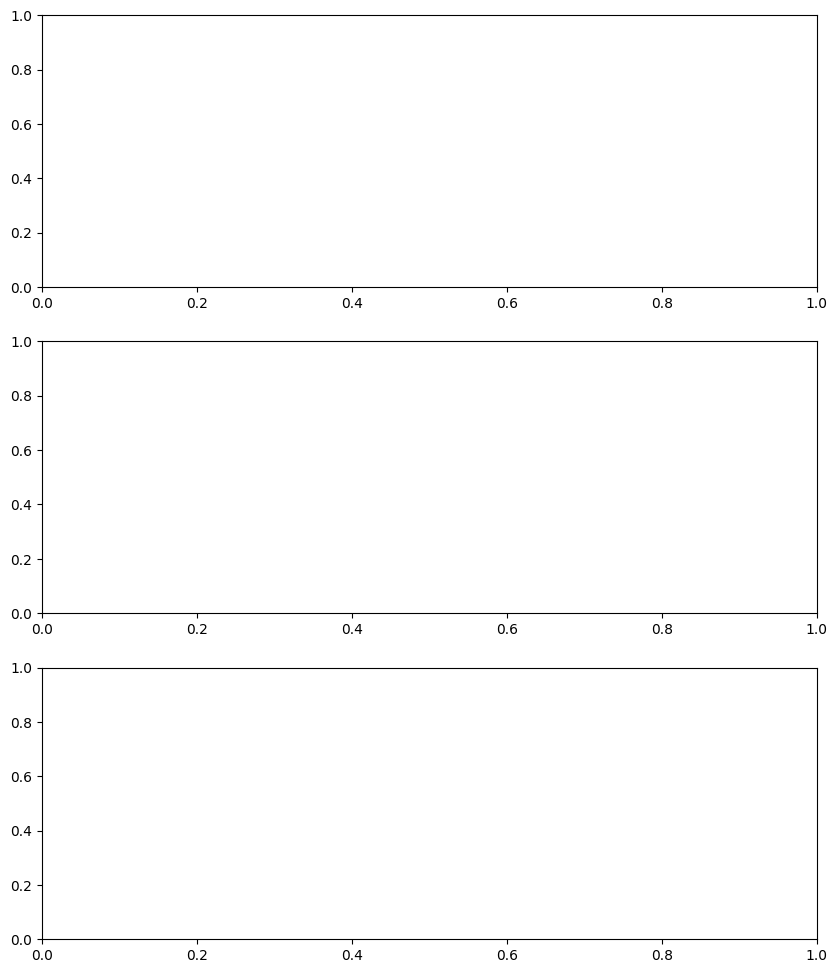

In [4]:
import matplotlib.pyplot as plt

# Plot histograms for hour of the day, day of the week, and month
fig, axes = plt.subplots(3, 1, figsize=(10, 12))
data['hour_of_day'].hist(ax=axes[0], bins=24, edgecolor='black')
data['day_of_week'].hist(ax=axes[1], bins=7, edgecolor='black')
data['month'].hist(ax=axes[2], bins=12, edgecolor='black')

# Set plot labels and titles
axes[0].set_xlabel('Hour of the Day')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Hour of the Day')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Day of the Week')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Month')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


- Nothing unusal as such found

# 4.Balance Changes
- Calculating the difference between the initial balance (oldbalanceOrg or oldbalanceDest) and the new balance (newbalanceOrig or newbalanceDest) after each transaction

- This can help identify abnormal changes in balances, which may indicate fraudulent behavior.

In [ ]:


# Convert step to datetime
data['timestamp'] = pd.to_datetime(data['step'] * 3600, unit='s')

# Sort the data by customer and timestamp
data.sort_values(['nameOrig', 'timestamp'], inplace=True)

# Calculate the time difference between consecutive transactions for each customer
data['time_diff'] = data.groupby('nameOrig')['timestamp'].diff()

# Calculate the average time difference between consecutive transactions for each customer
avg_time_between_transactions = data.groupby('nameOrig')['time_diff'].mean()

# Print the results
print("Average time between consecutive transactions for each customer:")
avg_time_between_transactions.head(100)


Average time between consecutive transactions for each customer:


nameOrig
C1000000639   NaT
C1000001337   NaT
C1000001725   NaT
C1000002591   NaT
C1000003372   NaT
               ..
C1000036439   NaT
C1000036527   NaT
C1000036998   NaT
C1000037043   NaT
C1000037068   NaT
Name: time_diff, Length: 100, dtype: timedelta64[ns]

# Enough Lets do some stats
- correlation matrix


<ipython-input-12-3b162891039d>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


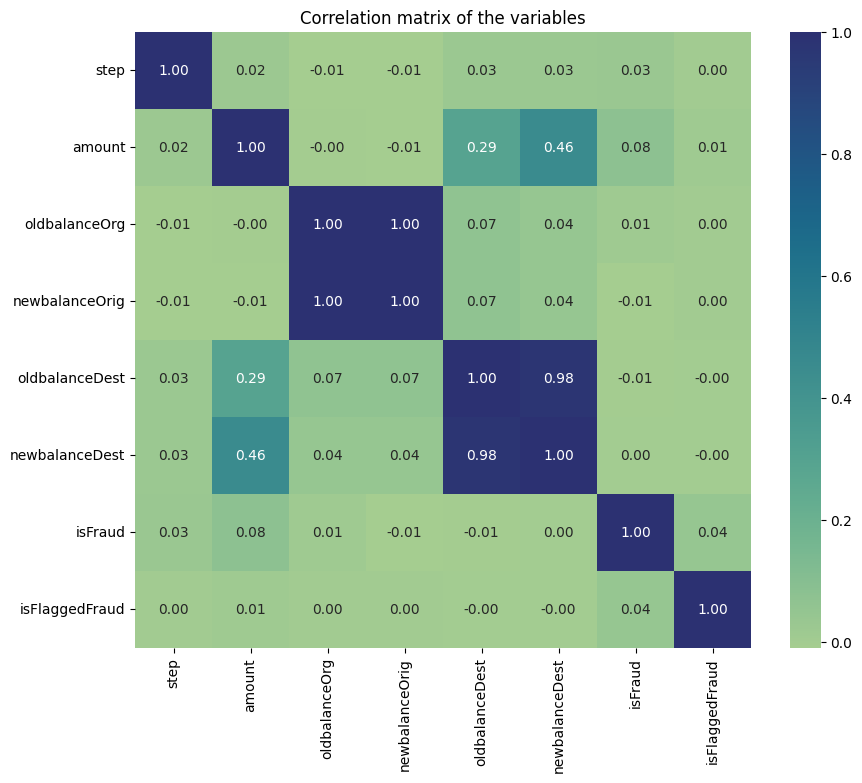

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# compute the correlation matrix
correlation_matrix = data.corr()

correlation_matrix
# Plot size
plt.figure(figsize=(10, 8))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True, square=True)

# Set the title of the plot
plt.title('Correlation matrix of the variables')

# Show the plot
plt.show()


so we see positive correlation among (isfraud and amount ), (oldbalance and newbalance).

- It says when the there is a fraud amount transfered is large
- coz of that there is huge difference in old and new balance

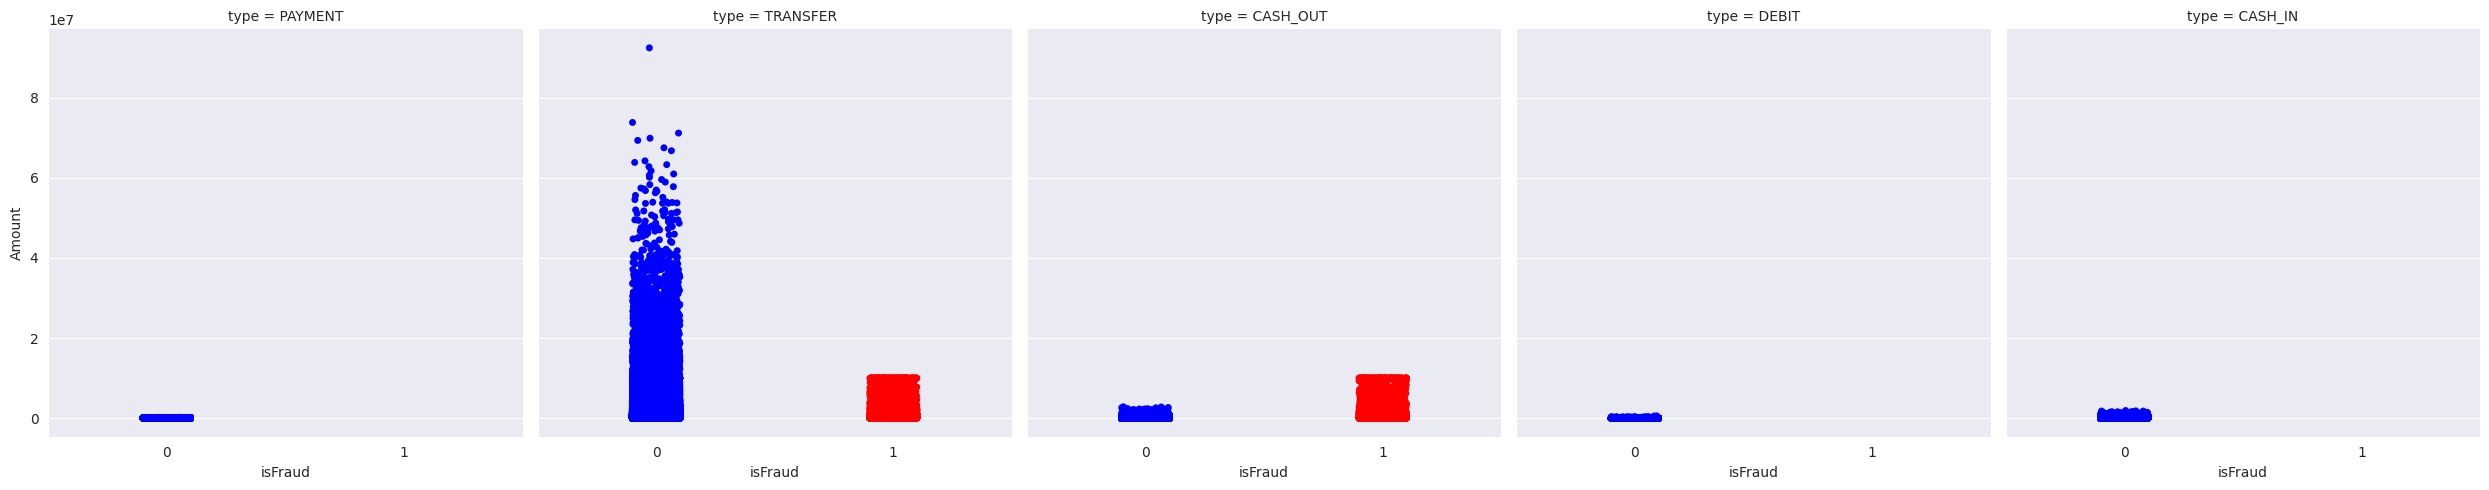

In [ ]:

sns.set_style('darkgrid')

# Create the catplot
cat_plot = sns.catplot(x='isFraud', y='amount', col='type', hue='isFraud', palette=['blue', 'red'], data=data)

# Set the plot labels
cat_plot.set_axis_labels('isFraud', 'Amount')

# Show the plot
plt.show()

SO fraud can be only seen in tranfer and cash out

#  Couting the number of each target class

In [12]:
data["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [13]:

data["isFlaggedFraud"].value_counts(normalize=False)

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

SO Falgged fraud is way to less as compared to actual fraud, so we can drop that coloumn

In [14]:
data.drop("isFlaggedFraud", axis=1, inplace=True)

In [ ]:
import pandas as pd

import pandas_profiling
pandas_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

- isfraud true = 8213
- isFraud is highly imbalanced (98.6%)
- Why would this be problematic? With so few positives relative to negatives, the training model will spend most of its time on negative examples and not learn enough from positive ones.
- first try training on the true distribution. If the model works well and generalizes, We're done! If not, will try  downsampling and upweighting technique.

In [15]:
data[data['isFraud'] == 0]['amount'].nlargest(10)


3686583    92445516.64
4060598    73823490.36
4146397    71172480.42
3946920    69886731.30
3911956    69337316.27
3937152    67500761.29
4105338    66761272.21
3892529    64234448.19
3991638    63847992.58
4143801    63294839.63
Name: amount, dtype: float64

In [6]:
data[data['isFraud']==1]['amount'].nlargest(1000)

4440       10000000.00
4441       10000000.00
481250     10000000.00
481251     10000000.00
586311     10000000.00
              ...     
1030738     3607917.73
643435      3606943.31
643436      3606943.31
1059638     3595911.39
1059639     3595911.39
Name: amount, Length: 1000, dtype: float64

- Looks like in fraud case the transection is maximum possible which is 10000000

# now lets prepare the features of the model

In [8]:
data_reduc = data.drop([ "nameDest", "nameOrig"], axis = 1)

- droped char columns

In [9]:
data_reduc.head()

step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1   9839.64       170136.0       160296.36             0.0   
1     1   1864.28        21249.0        19384.72             0.0   
2     1    181.00          181.0            0.00             0.0   
3     1    181.00          181.0            0.00         21182.0   
4     1  11668.14        41554.0        29885.86             0.0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0             0.0        0               0             0              0   
1             0.0        0               0             0              0   
2             0.0        1               0             0              0   
3             0.0        1               0             0              1   
4             0.0        0               0             0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0           0             1              0  
1           0             1              0  
2           0             0              1  
3           0             0              0  
4           0             1              0

- all fine, all numeric values, ready for model creation

# Data splitting for tarining, valiation and test set

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Separate the features and target variable
X = data_reduc.drop(['isFraud'], axis=1)
y = data_reduc['isFraud']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Print the shape of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (3817572, 12)
Shape of X_val: (1272524, 12)
Shape of X_test: (1272524, 12)
Shape of y_train: (3817572,)
Shape of y_val: (1272524,)
Shape of y_test: (1272524,)


# Model selection
- 1. start with a baseline model
logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.998228717100817
Precision: 0.3419226957383548
Recall: 0.42698019801980197
F1-score: 0.379746835443038
ROC AUC: 0.7129676379033535


- baseline model didnt work that good, need to find anyother way

So now we have few possiblity to explore
- 1. Undersampling: Randomly remove samples from the majority class (negative examples) to balance the class distribution. However, this may result in a loss of information and potential underfitting.
- 2. Oversampling: Increase the number of samples in the minority class (positive examples) by generating synthetic samples or duplicating existing samples. Techniques like Synthetic Minority Over-sampling Technique (SMOTE) can be useful for this purpose. However, oversampling may lead to overfitting and potentially memorizing the training data.


lets try  Resampling with ensemble methods
- Utilize ensemble methods like Balanced Random Forest or Easy Ensemble, which create multiple models on different balanced subsets of the data and combine their predictions to achieve better performance.

In [ ]:
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create an Easy Ensemble Classifier
eec = EasyEnsembleClassifier(n_estimators=10, random_state=42)

# Train the classifier on the training set
eec.fit(X_train, y_train)

# Predict on the validation set
y_pred = eec.predict(X_val)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9712445502010179
Precision: 0.041526845637583895
Recall: 0.9801980198019802
F1-score: 0.07967806841046278
ROC AUC: 0.9757155926906176


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Create a logistic regression model with class weight adjustment
logreg = LogisticRegression(class_weight='balanced')

# Train the model on the training set
logreg.fit(X_train, y_train)

# Predict on the validation set
y_pred = logreg.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)


Accuracy: 0.9123851495138795
Precision: 0.012891899560221309
Recall: 0.8997524752475248
F1-score: 0.025419580419580423
ROC AUC: 0.9060768438045402


still not good

To address the class imbalance issue, we can use the SMOTE (Synthetic Minority Oversampling Technique) algorithm. SMOTE creates synthetic data points for the minority class by selecting a sample and its nearest neighbors, and then generating new samples along the line between them. This helps equalize the number of instances between the two classes without duplicating existing data. Using SMOTE can mitigate the risk of overfitting and improve the model's performance on the minority class.

In [20]:
# Setting the seed

SEED = 42


In [21]:
# Instatiating SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

In [22]:
# Split the data set into dependent and independent variables

x = data_reduc.drop('isFraud', axis=1)
y = data_reduc['isFraud']


In [23]:
# Resampling the data

X_resampled, y_resampled = smote.fit_resample(x,y)


In [24]:
# Creating a balanced df

data_reduc = pd.concat([y_resampled, X_resampled], axis=1)
data_reduc

isFraud  step        amount  oldbalanceOrg  newbalanceOrig  \
0               0     1  9.839640e+03   1.701360e+05       160296.36   
1               0     1  1.864280e+03   2.124900e+04        19384.72   
2               1     1  1.810000e+02   1.810000e+02            0.00   
3               1     1  1.810000e+02   1.810000e+02            0.00   
4               0     1  1.166814e+04   4.155400e+04        29885.86   
...           ...   ...           ...            ...             ...   
12708809        1   248  1.622713e+06   1.622713e+06            0.00   
12708810        1   617  1.000000e+07   1.000000e+07            0.00   
12708811        1   208  9.018546e+05   9.018546e+05            0.00   
12708812        1   404  1.365631e+05   1.365631e+05            0.00   
12708813        1   405  1.022720e+05   1.022720e+05            0.00   

          oldbalanceDest  newbalanceDest  isFlaggedFraud  type_CASH_IN  \
0               0.000000    0.000000e+00               0             0   
1               0.000000    0.000000e+00               0             0   
2               0.000000    0.000000e+00               0             0   
3           21182.000000    0.000000e+00               0             0   
4               0.000000    0.000000e+00               0             0   
...                  ...             ...             ...           ...   
12708809   505566.365403    2.138033e+06               0             0   
12708810        0.000000    1.000000e+07               0             0   
12708811   714785.333096    1.616640e+06               0             0   
12708812        0.000000    0.000000e+00               0             0   
12708813        0.000000    1.022720e+05               0             0   

          type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0                     0           0             1              0  
1                     0           0             1              0  
2                     0           0             0              1  
3                     1           0             0              0  
4                     0           0             1              0  
...                 ...         ...           ...            ...  
12708809              1           0             0              0  
12708810              1           0             0              0  
12708811              1           0             0              0  
12708812              0           0             0              1  
12708813              1           0             0              0  

[12708814 rows x 13 columns]

In [25]:
# Checking if the outcome classes are the same

data_reduc["isFraud"].value_counts()


0    6354407
1    6354407
Name: isFraud, dtype: int64

Good,balanced ready to go

In [26]:
# Creating the dependent and independent variables

X = data_reduc.drop(["isFraud"], axis=1).values
y = (data_reduc["isFraud"]).values

In [27]:
# Splitting the data with test size of 0.25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = SEED)


Lets try logistic regression

In [28]:
# Fitting and predicting
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=SEED)
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)


NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score



# Assuming you have defined y_test and y_pred earlier

print_scores(y_test, y_pred)


Accuracy: 0.9067346635595323
Precision: 0.9129704086353517
Recall: 0.8992171072051438
F1-score: 0.9060415687018096


Satisfactory

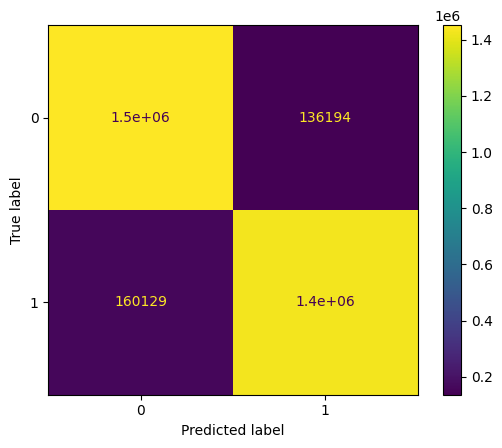

In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have defined y_test and y_pred earlier

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

False postitive and negetive is high need to reduce them
- A false positive means that the non-fraudulent transaction will be stopped and the client will call the bank to require it to continue it. A false negative implies more fraudulent transactions passing through our systems and this could lead to a loss of credibility and black flags from the gateway meaning loss of revenue. We must lower both numbers.


#lets try decision tree

In [31]:
# Instatiating decision tree
from sklearn.tree import DecisionTreeClassifier
tree =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)


In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [36]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def print_scores(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

# Assuming you have defined y_test and y_pred earlier

print_scores(y_test, y_pred)

Accuracy: 0.9991057143126574
Precision: 0.7515657620041754
Recall: 0.4444444444444444
F1-score: 0.5585725368502715


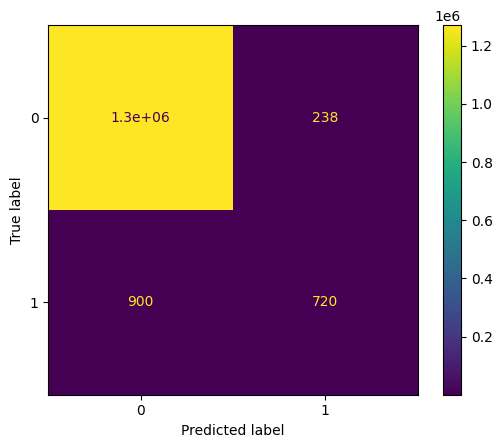

In [38]:
# Displaying confusion matrix
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The decision tree performed better than logistic regression . But we are facing the same problem as before, the number of false positives reduced but false negatives are quite high (dangerous) and it is necessary lower them even more. Let's try ensemble learning to improve the scores.

# Random Forest¶

In [40]:
# Instatiating the model

rf = RandomForestClassifier(max_depth= 5, random_state = SEED)


In [41]:
# Fitting and predicting

model = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print_scores(y_test, y_pred)



Accuracy: 0.9990829249585862
Precision: 1.0
Recall: 0.2796296296296296
F1-score: 0.43704775687409547


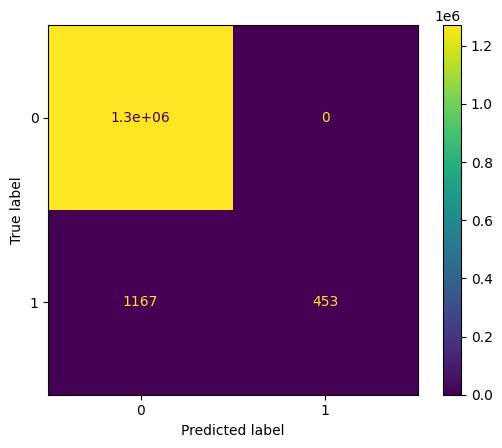

In [43]:
# Displaying confusion matrix
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Hyperparameter boosting with RandomizedSearchCV
RandomizedSearchCV takes a metric, a model, and several different parameters and chooses the best one based on the most important metric in each case. The algorithm will run every model with every possible hyperparameter combination possible and will select and display what are the best parameters and their metric value.


In [7]:
SEED2 = 70

In [8]:
# Setting the parameters
import numpy as np


n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]


In [9]:
# Dict with all the parameters

param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [10]:
# Instatiating the random forest
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(random_state=SEED2)


In [11]:
# Running the randomized search
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED2
)



In [12]:
# Fitting the model

%time
rcv = random_cv.fit(X, y)



CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs


NameError: ignored

In [3]:
# Fitting the model

%time
rcv = random_cv.fit(X, y)



CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


NameError: ignored

In [2]:
#  Creating a df with randomized search
import pandas as pd
pd.DataFrame(rcv.cv_results_)


NameError: ignored

In [ ]:
# Printing the best parameters

rcv.best_params_



Here we can see what are the best parameters for the random forest. Let's plug these into our final model.

# Final model


In [ ]:
# Building the final model

final_rf = RandomForestClassifier(**rcv.best_params_, random_state = SEED2)

model = final_rf.fit(X_train, y_train)
y_pred = final_rf.predict(X_test)

In [ ]:
# Printing final model scores

print_scores(y_test, y_pred)



In [ ]:
# Displaying confusion matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()